In [1]:
# 不满秩矩阵无法求逆，无法求逆就会导致线性回归的公式无法求解
# sklearn LinearRegession尽管可以求出解，但是不可靠
# 所以我们不应该让我们的数据集构成不满秩
# 不满秩数据集的出现通常有两种琴况：
# 1、数据特征很多，样本太少  L1/L2 还有其他不如将为、特征选择、特征融合
# 2、多重共线性导致（跟噪声类似，原始数据集一般都存在，只不过是严重还是不严重的问题）

# 解决不满秩的常见方法：（面试高危问题）
# L1/L2  还有其他常见的比如将为、特征选择、特征融合
# L1和L2 正则项：
# 正则项：是为了中和误差的人为添加的一些数据
# L1的正则是一次幂
# L2的正则是二次幂
# 岭回归：就是加入了L2正则的线性回归模型
# 劳斯回归：就是引入了L1正则的线性回归模型，同样也具备缩减的能力，但是更加暴躁

In [2]:
'''
L1/L2正则的对比：
1、L1是模型各个参数的绝对值之和
2、L2是模型各个参数的平方和的开方值
3、L1会趋向于产生少量的特征，而其他的特征都是0
    因为最优的参值大概率出现在坐标轴上，这样就会导致某一维的权重为0，产生稀疏权重矩阵
    L2会选择更多的特征，这些特征都会接近于0
    最优的参数值很小概率出现在坐标轴上，因此每一维的参数都不会是0.当最小化｜w｜时，就会使每一项趋近于0

L1/L2解决的问题
数据集如下情况：
1、特征个数>样本个数
2、多重共线性
会导致样本集呈现不满秩矩阵的分布规律
会解决这类问题：
1、则正选择、降维、增加样本个数
2、增加样本个数、添加正则项


L2正则为什么叫L2：
y = X_rue + noise + bias
(y_true - y)**2 最小化
(y_true - （y = X_rue + noise + bias）)**2 最小化


L1正则为什么叫L1：
model.coef_
|w1, w2, ......,wn|.sum() < alpha

L1和L2 都属于缩减算法，缩减掉一些无用特征对目标的影响

L2叫岭回归Ridge
L1叫拉回归Lasso
'''

'\nL1/L2正则的对比：\n1、L1是模型各个参数的绝对值之和\n2、L2是模型各个参数的平方和的开方值\n3、L1会趋向于产生少量的特征，而其他的特征都是0\n    因为最优的参值大概率出现在坐标轴上，这样就会导致某一维的权重为0，产生稀疏权重矩阵\n    L2会选择更多的特征，这些特征都会接近于0\n    最优的参数值很小概率出现在坐标轴上，因此每一维的参数都不会是0.当最小化｜w｜时，就会使每一项趋近于0\n\nL1/L2解决的问题\n数据集如下情况：\n1、特征个数>样本个数\n2、多重共线性\n会导致样本集呈现不满秩矩阵的分布规律\n会解决这类问题：\n1、则正选择、降维、增加样本个数\n2、增加样本个数、添加正则项\n\n\nL2正则为什么叫L2：\ny = X_rue + noise + bias\n(y_true - y)**2 最小化\n(y_true - （y = X_rue + noise + bias）)**2 最小化\n\n\nL1正则为什么叫L1：\nmodel.coef_\n|w1, w2, ......,wn|.sum() < alpha\n\nL1和L2 都属于缩减算法，缩减掉一些无用特征对目标的影响\n\nL2叫岭回归Ridge\nL1叫拉回归Lasso\n'

In [3]:
# L1和L2系数的区别
# 导入基本包
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [5]:
n_features = 200
n_sample = 50
X = np.random.random(size=(n_sample,n_features))

In [6]:
X.shape

(50, 200)

In [8]:
# y = W*X

NameError: name 'W' is not defined

In [14]:
# 生成一个W响亮，形状应该是200*1
W = np.random.random(size=200).reshape((-1,1))
W

array([[0.12107341],
       [0.13669045],
       [0.81291402],
       [0.79364635],
       [0.58668986],
       [0.04029237],
       [0.51173625],
       [0.07465904],
       [0.81330858],
       [0.24614992],
       [0.06237985],
       [0.10380515],
       [0.91304334],
       [0.52620723],
       [0.5393192 ],
       [0.24071828],
       [0.6189815 ],
       [0.58712265],
       [0.30224522],
       [0.90420233],
       [0.77387893],
       [0.56237575],
       [0.61060726],
       [0.21444198],
       [0.54415921],
       [0.52913978],
       [0.25731764],
       [0.90517654],
       [0.960716  ],
       [0.975416  ],
       [0.73818452],
       [0.26873787],
       [0.9252806 ],
       [0.08591455],
       [0.71952742],
       [0.61896537],
       [0.11738574],
       [0.81474704],
       [0.06621089],
       [0.56881015],
       [0.73929562],
       [0.2482351 ],
       [0.21747539],
       [0.6994564 ],
       [0.49336626],
       [0.08694622],
       [0.83604589],
       [0.066

In [17]:
y = np.dot(X,W)
y

array([[47.11203141],
       [46.8223231 ],
       [45.02062465],
       [46.67635356],
       [47.90744869],
       [46.79291968],
       [45.882637  ],
       [50.10522349],
       [42.58796326],
       [48.94581017],
       [54.30564354],
       [48.35958124],
       [48.5483979 ],
       [51.39814807],
       [50.54323441],
       [47.97529466],
       [49.8289143 ],
       [49.758207  ],
       [48.58920271],
       [50.56371929],
       [49.00859463],
       [52.07256265],
       [52.32188158],
       [52.7608131 ],
       [52.20145764],
       [48.69489191],
       [51.32217059],
       [50.8078479 ],
       [45.4878692 ],
       [48.31721836],
       [49.18269318],
       [53.14070027],
       [43.79630169],
       [48.88549642],
       [49.05906521],
       [51.12892015],
       [51.20891551],
       [55.45760522],
       [49.92469929],
       [49.65310968],
       [45.86030076],
       [50.21782954],
       [51.78269961],
       [51.38732958],
       [46.27153807],
       [47

In [18]:
# 假设真实数据中，只有10个特征对目标有影响
W[:,0]

array([0.12107341, 0.13669045, 0.81291402, 0.79364635, 0.58668986,
       0.04029237, 0.51173625, 0.07465904, 0.81330858, 0.24614992,
       0.06237985, 0.10380515, 0.91304334, 0.52620723, 0.5393192 ,
       0.24071828, 0.6189815 , 0.58712265, 0.30224522, 0.90420233,
       0.77387893, 0.56237575, 0.61060726, 0.21444198, 0.54415921,
       0.52913978, 0.25731764, 0.90517654, 0.960716  , 0.975416  ,
       0.73818452, 0.26873787, 0.9252806 , 0.08591455, 0.71952742,
       0.61896537, 0.11738574, 0.81474704, 0.06621089, 0.56881015,
       0.73929562, 0.2482351 , 0.21747539, 0.6994564 , 0.49336626,
       0.08694622, 0.83604589, 0.066092  , 0.14865355, 0.11634554,
       0.7885703 , 0.17774171, 0.20604071, 0.57243607, 0.90082719,
       0.1171339 , 0.15764538, 0.88956234, 0.52954846, 0.30424771,
       0.24585703, 0.70835688, 0.31197608, 0.14374027, 0.36121452,
       0.4791652 , 0.91106543, 0.30786302, 0.16167181, 0.99405367,
       0.0483462 , 0.71489409, 0.5393322 , 0.71073016, 0.93279

In [24]:
# 生成随机索引
random_index = np.random.permutation(n_features)
# 选出其中的190个索引，把这些索引再想W向量中对应的值清零
zero_index = random_index[10:]
W[zero_index ] = 0

In [25]:
# 把仅有10个非零的W响亮作为我们真实值的权重
W

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.56237575],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [26]:
y_true = np.dot(X,W)

In [27]:
y_true

array([[2.28183792],
       [2.87967946],
       [2.33330554],
       [1.91389223],
       [1.76805172],
       [1.86450692],
       [1.90440542],
       [2.31341756],
       [1.82208981],
       [2.95046729],
       [2.2727325 ],
       [1.77298437],
       [2.27598469],
       [2.27209232],
       [2.34506753],
       [1.90711656],
       [1.8326495 ],
       [1.76214927],
       [1.48525621],
       [2.3985961 ],
       [2.01738956],
       [2.99525252],
       [3.31033287],
       [3.03974771],
       [1.67456846],
       [2.05207374],
       [2.06515548],
       [2.54564124],
       [2.91168193],
       [3.15869418],
       [2.29716591],
       [2.82108745],
       [1.67647872],
       [3.11545669],
       [2.95043631],
       [2.58066847],
       [2.82234221],
       [2.03738052],
       [2.18665126],
       [2.23758385],
       [2.88795137],
       [2.1672641 ],
       [2.76008536],
       [3.15476853],
       [1.70321253],
       [2.05700518],
       [2.36564143],
       [1.933

In [67]:
# 构造3个线性模型，比较各个模型得到的系数和W之间的区别
linear = LinearRegression() #线性回归
# alhpa就是正则项系数
ridge = Ridge(alpha=10) # L2 正则，系数更倾向于0
lasso = Lasso(alpha=0.01) # L1 正则，更容易产生稀疏矩阵

In [68]:
linear.fit(X, y_true)
ridge.fit(X, y_true)
lasso.fit(X, y_true)

Lasso(alpha=0.01)

In [69]:
linear.coef_

array([[ 0.02612817,  0.0329494 , -0.03345591,  0.01393671,  0.01855899,
        -0.02969405,  0.07886105, -0.00971648, -0.04636261,  0.14183655,
         0.02583248, -0.01690081,  0.19057549,  0.05078626,  0.00390654,
        -0.04060662, -0.00283866, -0.05552138, -0.05868282, -0.0111444 ,
         0.0037158 ,  0.10816053, -0.02658571,  0.08140452, -0.04546115,
         0.02176557,  0.00421547,  0.00625441,  0.06148676, -0.06237977,
         0.05934553,  0.00090717, -0.04746885, -0.00089979, -0.14326524,
         0.02819317, -0.02699205, -0.04279064,  0.00512786, -0.0722101 ,
        -0.05712509, -0.02672775,  0.04408643, -0.03355415, -0.07281217,
        -0.04715016,  0.02977219, -0.04087925,  0.032768  , -0.02708543,
        -0.03216756,  0.03372292,  0.01007575, -0.0072455 ,  0.14314466,
         0.06663363, -0.08147991,  0.01861627, -0.09321365,  0.01403351,
        -0.02629737,  0.02427996, -0.04288749, -0.00902078,  0.02789672,
        -0.01448448, -0.06801622,  0.11443333, -0.1

In [70]:
ridge.coef_[0]

array([ 1.86400676e-02,  3.25315319e-02, -1.53335761e-02,  6.40991513e-03,
        1.80199857e-02, -4.37600629e-03,  4.24156059e-02, -9.97739467e-03,
       -3.54288249e-02,  8.29447857e-02,  2.05669977e-02, -2.24615397e-02,
        1.08428497e-01,  2.91495823e-02,  1.40363726e-02, -1.54849919e-02,
        3.71051570e-03, -1.81237690e-02, -3.52983501e-02, -7.57088434e-04,
        1.46622532e-02,  4.68277591e-02, -1.29921798e-02,  4.68636161e-02,
       -3.90983334e-02,  2.14688739e-02,  5.66112063e-04,  9.25069518e-03,
        3.76475450e-02, -4.30288202e-02,  4.53341943e-02,  3.91646831e-03,
       -1.65891201e-02, -8.86821078e-03, -9.21503296e-02,  1.83617996e-02,
       -3.39415356e-02, -2.40753565e-02,  5.71784444e-03, -3.84873409e-02,
       -1.37197343e-02, -1.32727494e-02,  2.57713209e-02, -1.19084335e-02,
       -4.56402683e-02, -8.50997411e-03,  8.29353677e-03, -2.77979181e-02,
        4.34269233e-03,  2.46147127e-03, -8.50525064e-03,  2.09960661e-02,
        2.78436995e-02, -

In [71]:
lasso.coef_

array([ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.00945678,
        0.        , -0.        ,  0.03570032,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.34239893, -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.02322512,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.06202896,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.2607799 , -0.        , -0.  

In [72]:
# 画图展示
sns.set()

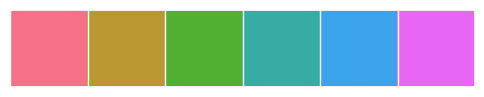

In [73]:
colors = sns.color_palette("husl")
sns.palplot(colors)

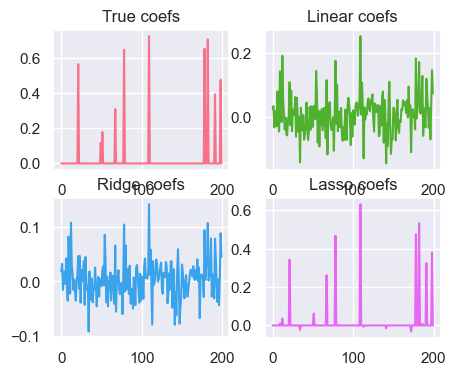

In [78]:
plt.figure(figsize=(5,4))
ax1 = plt.subplot(2,2,1)
ax1.set_title("True coefs")
ax1.plot(W[:,0], color=colors[0])

ax2 = plt.subplot(2,2,2)
ax2.set_title("Linear coefs")
ax2.plot(linear.coef_[0], color=colors[2])

ax3 = plt.subplot(2,2,3)
ax3.set_title("Ridge coefs")
ax3.plot(ridge.coef_[0], color=colors[4])

ax4 = plt.subplot(2,2,4)
ax4.set_title("Lasso coefs")
ax4.plot(lasso.coef_, color=colors[5])